# Observed Taylor law: variance vs mean 
**in the protein coding gene length distributions for the different species**

## Import python modules

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from plotnine import *

import sys
sys.path.append('../lib/')
import constants as c

## The protein coding gene length distributions for the different species

### Retrieving the statistical descriptions of the gene length's distributions

#### Statistical description 

In [2]:
# statistics on length distributions 
stat_file = c.STAT_G_FILE
print("The statistical descriptions of the protein coding gene distributions for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["division_both_dbs", "species", "count", "mean", "var", "log10_mean", "log10_var"]]

# visualize data
if 1:
    pd.set_option('display.max_columns', None)
    display(stat_df.head(2))
    print(stat_df.shape)
    print(stat_df["division_both_dbs"].value_counts())

The statistical descriptions of the protein coding gene distributions for the different species is in:
 /home/emuro/git/github/EM_geneLength_nature/main_work/../lib/../main_tables/stat_protCodGenes.tsv 



,division_both_dbs,species,count,mean,var,log10_mean,log10_var
0,archaea,methanobacterium_bryantii_gca_002287175,3168,840.404040,422343.848699,2.827684,0.082694
1,archaea,methanobacterium_formicicum_gca_000762265,2352,862.427296,347239.612747,2.849723,0.076317


(33627, 7)
division_both_dbs
bacteria         30714
archaea           1229
fungi             1014
protists           237
vertebrates        222
invertebrates      115
plants              96
Name: count, dtype: int64


## Python functions

In [3]:
def plot_taylor (df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression): 
    #Calculate best fit line
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(df2plot[col_x]),np.log10(df2plot[col_y]))
    #Format the regression text
    if 0: 
        print("v = {:4.4} * m^{:4.4};   R^2= {:2.4f}".format(10**intercept, slope, r_value**2))
    if bool_show_regression:
        txt = '$\sigma^{2} = ' + '{:4.2} '.format(10**intercept)  + ' \t ' + '\mu^{' + '{:4.3}'.format(slope) + '}' + ';\tR^{2} = ' + '{:2.2f}$'.format(r_value**2)
    else:
        txt = ''
        
    p = (   
        ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + 
        geom_point(size=0.15) + #, alpha=0.4) + # color, fill
        geom_smooth(method="lm", color="green", size=0.25, span=.8) +
        labs(title=title, x=x_lab, y=y_lab) 
        # fill does not work at the moment:
        #+ scale_color_fill(values=c.COLOR_ORG_GROUPS) # + scale_color_brewer() '#5C2D91'
        #+ scale_alpha_manual(values=c.ALPHA_ORG_GROUPS) # + 
        + scale_color_manual(values=c.OLD_COLOR_ORG_GROUPS) # + scale_color_brewer() '#5C2D91'
        + labs(color='Group of organisms') # legend title
        + scale_x_log10(breaks=[10 ** power for power in range(6)],
          limits=[min(df2plot[col_x].to_list())/2, 2*max(df2plot[col_x].to_list())]) 
        + scale_y_log10(breaks = [10**power for power in range(13)], 
          limits = [min(df2plot[col_y].to_list())/2,2*max(df2plot[col_y].to_list())])#, labels=scientific_format(digits=2)
    ) + theme(legend_position=(0.7,0.2), legend_key_size=2, legend_background=element_rect(fill='grey', alpha=0.01)) + annotate('text', x=0.01*max(df2plot[col_x].to_list()), y=0.65*max(df2plot[col_y].to_list()), label=txt,size=9,color="black")
    print(p)

#### Check groups of organisms

In [4]:
if 1:
    print(stat_df.shape)
    print(stat_df["division_both_dbs"].value_counts())

(33627, 7)
division_both_dbs
bacteria         30714
archaea           1229
fungi             1014
protists           237
vertebrates        222
invertebrates      115
plants              96
Name: count, dtype: int64


## Variance vs. mean (represented in $log_{10}$ scale)
## Protein coding gene length distributions  
$\sigma^{2}$ is the variance   
$\mu$ is the mean  

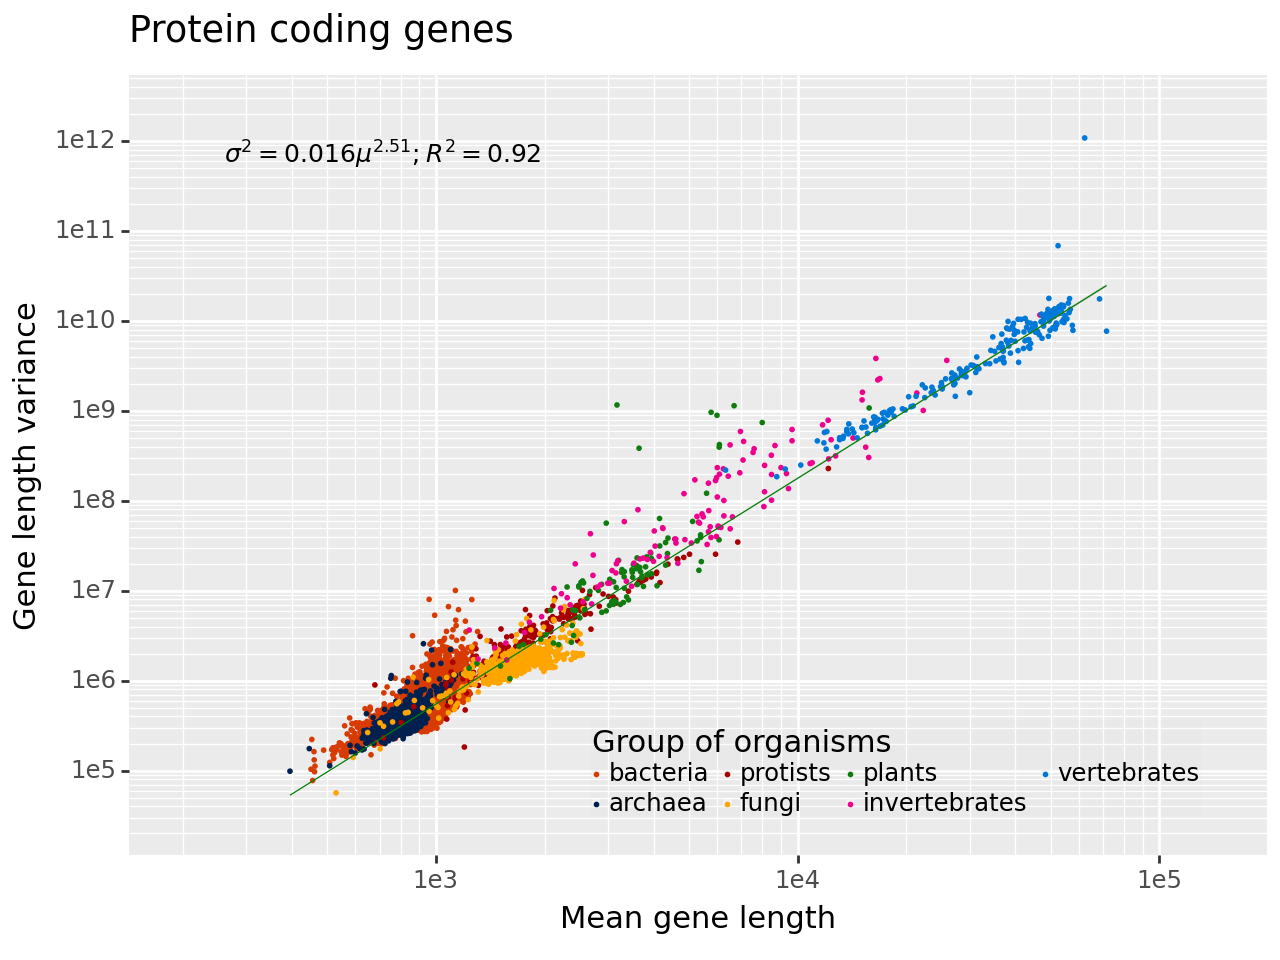

In [5]:
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "division_both_dbs"

title = "Protein coding genes" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean gene length"   
y_lab = "Gene length variance"
bool_show_regression = True

df2plot = stat_df
if 0:
    print(df2plot.shape)

# Sort division_both_dbs in order to plot the clades in an order (everything can be displayed)
if 0:
    print(df2plot.division_both_dbs.unique())
df2plot.division_both_dbs = pd.Categorical(df2plot.division_both_dbs, 
                                categories=c.ORG_GROUPS,           
                                #categories=['bacteria', 'archaea', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot.sort_values('division_both_dbs', inplace=True)

plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression)

#### Note:  
$\sigma^{2} = a . \mu^{\beta}$   
Because the regression line is:  
$\log(\sigma^{2}) = \log(a) + \beta log(\mu) $